In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.	Valentino – PNW regulated market - Merchant
2.	Mantero – MISO - Merchant
3.	Howling Gale – MISO - Merchant
4.	Ventus Village – PJM – Merchant
5.	Salmon Valley – ERCOT - Merchant


In [10]:
df_miso = pd.read_csv("./data/miso/miso_merged.csv")
df_miso_original = pd.read_csv("./data/miso/miso_load_for_hr_2023.csv", header=3)

In [11]:
df_miso_original.head()

,UTC Timestamp (Interval Ending),Local Timestamp Eastern Standard Time (Interval Beginning),Local Timestamp Eastern Standard Time (Interval Ending),Local Date,Hour Number,MISO Total Forecast Load (MW),"LRZ 1 (States: MT, ND, SD, MN, WI, IL)\nBalancing Authorities: DPC, GRE, MDU, MP, NSP, OTP, SMP Forecast Load (MW)","LRZ 2, 7 (States: WI, MI)\nBalancing Authorities: ALTE, MGE, UPPC, WEC, WPS, MIUP, CONS, DECO Forecast Load (MW)","LRZ 3, 5 (States: MN, IA, KS, IL)\nBalancing Authorities: ALTW, MEC, MPW, AMMO, CWLD Forecast Load (MW)","LRZ 4 (States: IL)\nBalancing Authorities: AMIL, CWLP, SIPC Forecast Load (MW)","LRZ 6 (States: IN)\nBalancing Authorities: BREC, CIN, HE, IPL, NIPSCO, SIGE Forecast Load (MW)","LRZ 8, 9, 10 (States: MO, TX, MS, AL)\nBalancing Authorities: EAI, CLEC, EES, LAFA, LAGN, LEPA, EMBA, SME Forecast Load (MW)"
0,2023-01-01 06:00:00,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01,1,62555.0,10446.0,14492.0,8934.0,4550.0,8339.0,15794.0
1,2023-01-01 07:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01,2,60658.0,10148.0,14035.0,8684.0,4400.0,8141.0,15250.0
2,2023-01-01 08:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01,3,59459.0,9957.0,13744.0,8552.0,4314.0,8011.0,14881.0
3,2023-01-01 09:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01,4,59622.0,9861.0,14369.0,8507.0,4270.0,7934.0,14681.0
4,2023-01-01 10:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01,5,59331.0,9840.0,14277.0,8502.0,4227.0,7887.0,14598.0


In [12]:
df_miso_original["Month"] = df_miso_original["Local Date"].apply(lambda x: x.split("-")[1])

In [13]:
df_miso_original["Month"].value_counts()

Month
01    744
03    744
05    744
10    744
12    744
04    720
06    720
11    696
02    672
07    552
09    504
Name: count, dtype: int64

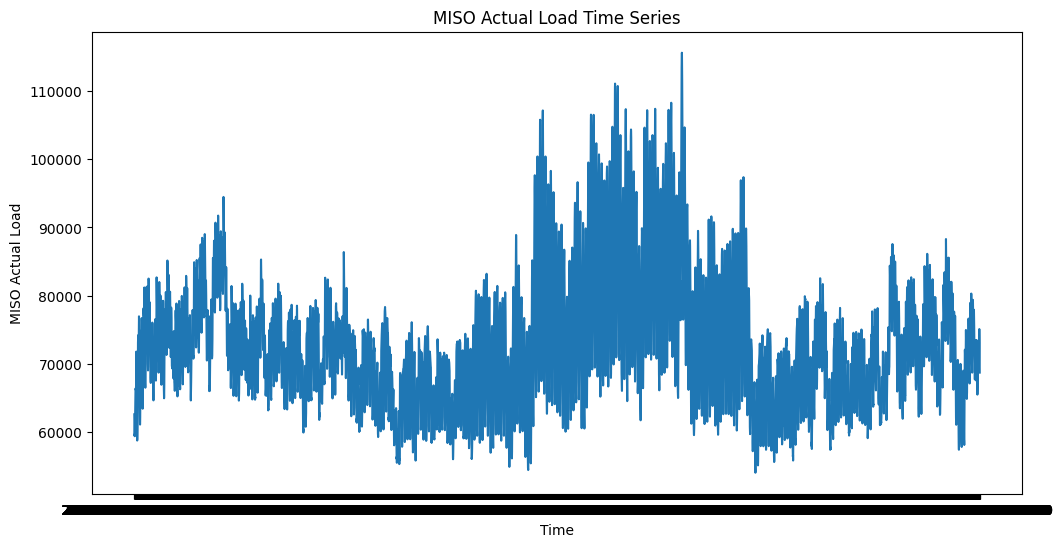

In [25]:
# plot the time series of the data
plt.figure(figsize=(12, 6))
plt.plot(df_miso_original["Local Timestamp Eastern Standard Time (Interval Beginning)"], df_miso_original["MISO Total Forecast Load (MW)"])
plt.xlabel("Time")
plt.ylabel("MISO Actual Load")
plt.title("MISO Actual Load Time Series")
plt.show()

In [3]:
df_miso.head()  

,Unnamed: 0,UTC Timestamp (Interval Ending),Local Timestamp Eastern Standard Time (Interval Beginning),Local Timestamp Eastern Standard Time (Interval Ending),Local Date,Hour Number,MISO Total Total Generation (MW),MISO Total Solar Generation (MW),MISO Total Storage Generation (MW),MISO Total Wind Generation (MW),MISO Total Actual Load (MW),MISO Total Forecast Load (MW)
0,0,2023-01-01 06:00:00,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01,1,60499.7,0.0,0.0,9431.5,63070.04,62555.0
1,1,2023-01-01 07:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01,2,57909.8,0.0,0.0,9848.1,61633.42,60658.0
2,2,2023-01-01 08:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01,3,56790.3,0.0,0.0,9535.9,60371.54,59459.0
3,3,2023-01-01 09:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01,4,55732.0,0.0,0.0,9732.0,59517.65,59622.0
4,4,2023-01-01 10:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01,5,55512.8,0.0,0.0,10310.8,59121.89,59331.0


In [4]:
df_miso["Month"] = df_miso["Local Date"].apply(lambda x: x.split("-")[1]).astype(int)

In [6]:
df_miso["Hour Number"].value_counts()

Hour Number
1     312
2     312
23    312
22    312
21    312
20    312
19    312
18    312
17    312
16    312
15    312
14    312
13    312
12    312
11    312
10    312
9     312
8     312
7     312
6     312
5     312
4     312
3     312
24    312
Name: count, dtype: int64

In [20]:
df_mantero = pd.read_csv("./data/mantero.csv")

In [21]:
df_mantero.head()

,Timestamp,Year,Month,Day,Hour Ending,Maximum energy deliverable before curtailment (MWh),Energy actually delivered (MWh),Curtailment (MWh),Price ($/MWh) at the nodal level in the Real Time market
0,1/1/2023 1:00,2023,1,1,1,52.7,52.7,0,25.93
1,1/1/2023 2:00,2023,1,1,2,41.1,41.1,0,21.98
2,1/1/2023 3:00,2023,1,1,3,39.6,39.6,0,23.30
3,1/1/2023 4:00,2023,1,1,4,43.2,43.2,0,21.40
4,1/1/2023 5:00,2023,1,1,5,34.8,34.8,0,22.16


In [17]:
df_mantero.Month.value_counts()

Month
1     744
5     744
7     744
8     744
10    744
12    744
3     743
11    721
4     720
6     720
9     720
2     672
Name: count, dtype: int64

In [27]:
df_miso.head()

,Unnamed: 0,UTC Timestamp (Interval Ending),Local Timestamp Eastern Standard Time (Interval Beginning),Local Timestamp Eastern Standard Time (Interval Ending),Local Date,Hour Number,MISO Total Total Generation (MW),MISO Total Solar Generation (MW),MISO Total Storage Generation (MW),MISO Total Wind Generation (MW),MISO Total Actual Load (MW),MISO Total Forecast Load (MW)
0,0,2023-01-01 06:00:00,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01,1,60499.7,0.0,0.0,9431.5,63070.04,62555.0
1,1,2023-01-01 07:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01,2,57909.8,0.0,0.0,9848.1,61633.42,60658.0
2,2,2023-01-01 08:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01,3,56790.3,0.0,0.0,9535.9,60371.54,59459.0
3,3,2023-01-01 09:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01,4,55732.0,0.0,0.0,9732.0,59517.65,59622.0
4,4,2023-01-01 10:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01,5,55512.8,0.0,0.0,10310.8,59121.89,59331.0


In [30]:
def make_timestamp(df):
    local_time_beginning = df["Local Timestamp Eastern Standard Time (Interval Beginning)"]
    df["Hour Ending"] = local_time_beginning.str.split(" ").str[1].str.split(":").str[0].astype(int) + 1
    df["Timestamp"] = local_time_beginning.str.split(" ").str[0] + " " + df["Hour Ending"].astype(str) + ":00"
    df["Timestamp"] = df["Timestamp"].str.replace("-", "/")
    df["Year"] = local_time_beginning.str.split(" ").str[0].str.split("-").str[0]
    df["Month"] = local_time_beginning.str.split(" ").str[0].str.split("-").str[1].str.lstrip("0")
    df["Day"] = local_time_beginning.str.split(" ").str[0].str.split("-").str[2].str.lstrip("0")
    df["Year"] = df["Year"].astype(int)
    df["Month"] = df["Month"].astype(int)
    df["Day"] = df["Day"].astype(int)
    return df


In [31]:
df_miso = make_timestamp(df_miso)

In [32]:
df_miso.head()

,Unnamed: 0,UTC Timestamp (Interval Ending),Local Timestamp Eastern Standard Time (Interval Beginning),Local Timestamp Eastern Standard Time (Interval Ending),Local Date,Hour Number,MISO Total Total Generation (MW),MISO Total Solar Generation (MW),MISO Total Storage Generation (MW),MISO Total Wind Generation (MW),MISO Total Actual Load (MW),MISO Total Forecast Load (MW),Hour Ending,Timestamp,Year,Month,Day
0,0,2023-01-01 06:00:00,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01,1,60499.7,0.0,0.0,9431.5,63070.04,62555.0,1,2023/01/01 1:00,2023,1,1
1,1,2023-01-01 07:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01,2,57909.8,0.0,0.0,9848.1,61633.42,60658.0,2,2023/01/01 2:00,2023,1,1
2,2,2023-01-01 08:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01,3,56790.3,0.0,0.0,9535.9,60371.54,59459.0,3,2023/01/01 3:00,2023,1,1
3,3,2023-01-01 09:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01,4,55732.0,0.0,0.0,9732.0,59517.65,59622.0,4,2023/01/01 4:00,2023,1,1
4,4,2023-01-01 10:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01,5,55512.8,0.0,0.0,10310.8,59121.89,59331.0,5,2023/01/01 5:00,2023,1,1


In [44]:
index_cols = ["Year", "Month", "Day", "Hour Ending"]
target_col = ["Price ($/MWh) at the nodal level in the Real Time market"]
filtered_mantero = df_mantero[index_cols + target_col]
df_merged = pd.merge(df_miso, filtered_mantero, on=index_cols, how="left")

In [45]:
df_merged.isnull().sum()

Unnamed: 0                                                    0
UTC Timestamp (Interval Ending)                               0
Local Timestamp Eastern Standard Time (Interval Beginning)    0
Local Timestamp Eastern Standard Time (Interval Ending)       0
Local Date                                                    0
Hour Number                                                   0
MISO Total Total Generation (MW)                              0
MISO Total Solar Generation (MW)                              0
MISO Total Storage Generation (MW)                            0
MISO Total Wind Generation (MW)                               0
MISO Total Actual Load (MW)                                   0
MISO Total Forecast Load (MW)                                 0
Hour Ending                                                   0
Timestamp                                                     0
Year                                                          0
Month                                   

In [46]:
# rename Price column
df_merged.rename(columns={"Price ($/MWh) at the nodal level in the Real Time market": "Price"}, inplace=True)

In [47]:
df_merged[df_merged["Price"].isnull()]

,Unnamed: 0,UTC Timestamp (Interval Ending),Local Timestamp Eastern Standard Time (Interval Beginning),Local Timestamp Eastern Standard Time (Interval Ending),Local Date,Hour Number,MISO Total Total Generation (MW),MISO Total Solar Generation (MW),MISO Total Storage Generation (MW),MISO Total Wind Generation (MW),MISO Total Actual Load (MW),MISO Total Forecast Load (MW),Hour Ending,Timestamp,Year,Month,Day,Price
1681,1681,2023-03-12 07:00:00,2023-03-12 01:00:00,2023-03-12 02:00:00,2023-03-12,2,60789.1,0.7,0.0,9312.9,63733.11,64396.0,2,2023/03/12 2:00,2023,3,12,NaN


In [48]:
# drop the null
df_merged.dropna(inplace=True)

In [49]:
df_merged.isnull().sum()

Unnamed: 0                                                    0
UTC Timestamp (Interval Ending)                               0
Local Timestamp Eastern Standard Time (Interval Beginning)    0
Local Timestamp Eastern Standard Time (Interval Ending)       0
Local Date                                                    0
Hour Number                                                   0
MISO Total Total Generation (MW)                              0
MISO Total Solar Generation (MW)                              0
MISO Total Storage Generation (MW)                            0
MISO Total Wind Generation (MW)                               0
MISO Total Actual Load (MW)                                   0
MISO Total Forecast Load (MW)                                 0
Hour Ending                                                   0
Timestamp                                                     0
Year                                                          0
Month                                   

In [50]:
df_merged.head()

,Unnamed: 0,UTC Timestamp (Interval Ending),Local Timestamp Eastern Standard Time (Interval Beginning),Local Timestamp Eastern Standard Time (Interval Ending),Local Date,Hour Number,MISO Total Total Generation (MW),MISO Total Solar Generation (MW),MISO Total Storage Generation (MW),MISO Total Wind Generation (MW),MISO Total Actual Load (MW),MISO Total Forecast Load (MW),Hour Ending,Timestamp,Year,Month,Day,Price
0,0,2023-01-01 06:00:00,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01,1,60499.7,0.0,0.0,9431.5,63070.04,62555.0,1,2023/01/01 1:00,2023,1,1,25.93
1,1,2023-01-01 07:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01,2,57909.8,0.0,0.0,9848.1,61633.42,60658.0,2,2023/01/01 2:00,2023,1,1,21.98
2,2,2023-01-01 08:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01,3,56790.3,0.0,0.0,9535.9,60371.54,59459.0,3,2023/01/01 3:00,2023,1,1,23.30
3,3,2023-01-01 09:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01,4,55732.0,0.0,0.0,9732.0,59517.65,59622.0,4,2023/01/01 4:00,2023,1,1,21.40
4,4,2023-01-01 10:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01,5,55512.8,0.0,0.0,10310.8,59121.89,59331.0,5,2023/01/01 5:00,2023,1,1,22.16


In [51]:
# groupby hour and plot the MISO Total Forecast Load (MW)
df_grouped = df_merged.groupby("Hour Ending")

In [52]:
df_grouped

In [41]:
# create dummies for hour
df_merged = pd.get_dummies(df_merged, columns=["Hour Ending"], drop_first=True)

In [42]:
df_merged.head()

,Unnamed: 0,UTC Timestamp (Interval Ending),Local Timestamp Eastern Standard Time (Interval Beginning),Local Timestamp Eastern Standard Time (Interval Ending),Local Date,Hour Number,MISO Total Total Generation (MW),MISO Total Solar Generation (MW),MISO Total Storage Generation (MW),MISO Total Wind Generation (MW),...,Hour Ending_15,Hour Ending_16,Hour Ending_17,Hour Ending_18,Hour Ending_19,Hour Ending_20,Hour Ending_21,Hour Ending_22,Hour Ending_23,Hour Ending_24
0,0,2023-01-01 06:00:00,2023-01-01 00:00:00,2023-01-01 01:00:00,2023-01-01,1,60499.7,0.0,0.0,9431.5,...,False,False,False,False,False,False,False,False,False,False
1,1,2023-01-01 07:00:00,2023-01-01 01:00:00,2023-01-01 02:00:00,2023-01-01,2,57909.8,0.0,0.0,9848.1,...,False,False,False,False,False,False,False,False,False,False
2,2,2023-01-01 08:00:00,2023-01-01 02:00:00,2023-01-01 03:00:00,2023-01-01,3,56790.3,0.0,0.0,9535.9,...,False,False,False,False,False,False,False,False,False,False
3,3,2023-01-01 09:00:00,2023-01-01 03:00:00,2023-01-01 04:00:00,2023-01-01,4,55732.0,0.0,0.0,9732.0,...,False,False,False,False,False,False,False,False,False,False
4,4,2023-01-01 10:00:00,2023-01-01 04:00:00,2023-01-01 05:00:00,2023-01-01,5,55512.8,0.0,0.0,10310.8,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# groupby and visualize the Hour Ending 
df_grouped = df_merged.groupby("Hour Ending")

KeyError: 'Hour Ending'

In [ ]:
X_cols = ["MISO Total Forecast Load (MW)"]